In [10]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

model = read_sbml_model('Models/iML1515.xml')

# Print all the reactions involving extra-cellular L-aspartate
for reaction in model.metabolites.asp__L_e.reactions:
    print(reaction.id, reaction, reaction.name)


# Set the objective function for the biomass model
model.objective= 'BIOMASS_Ec_iML1515_core_75p37M' 
model_ojective_value = print (model.optimize().objective_value)


#set the optimal value for biomass to 100%
model.reactions.BIOMASS_Ec_iML1515_core_75p37M.upper_bound=0.873920
#set the lower bound to not be less than 75 % of the optimal value
model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound=0.873920*0.75
#print the new objective value
model_BM_optimized = print(model.optimize().objective_value)


# Setting a new objective function based on L-asp production rate
with model:
    model.objective = model.reactions.EX_asp__L_e
    model_asp_optimized = print (model.optimize().objective_value)



ASPtex ASPtex: asp__L_e <=> asp__L_p L-aspartate transport via diffusion (extracellular to periplasm)
EX_asp__L_e EX_asp__L_e: asp__L_e -->  L-Aspartate exchange
0.87699721425716
0.87392
4.596027557488181


In [11]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope


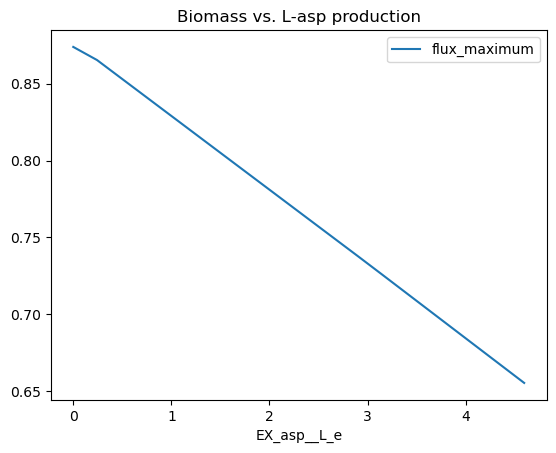

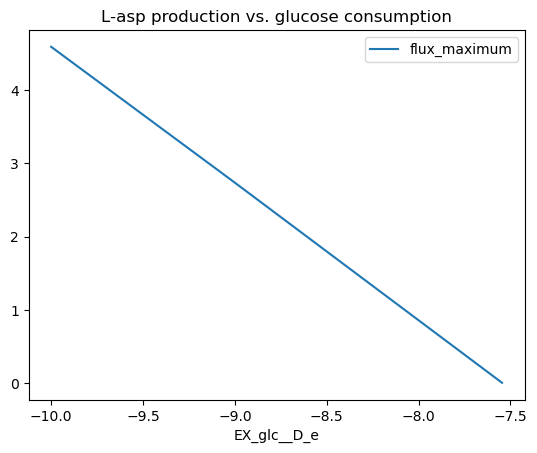

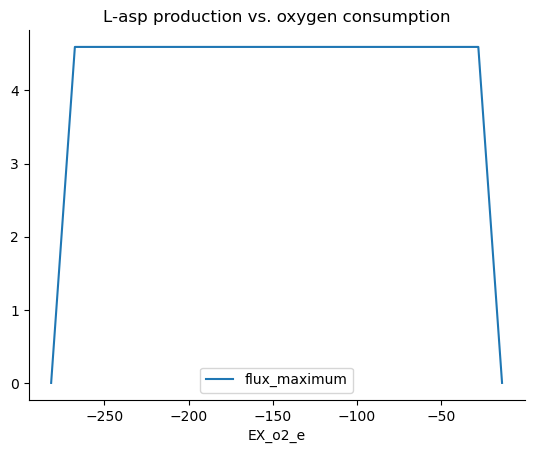

In [20]:
medium = model.medium
with model:
    model.medium = medium
    model.objective = model.reactions.EX_asp__L_e
    asp_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model, 
                                      reactions = [model.reactions.EX_asp__L_e], 
                                            objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_asp = production_envelope(model, 
                                  reactions = [model.reactions.EX_glc__D_e], 
                                  objective = model.reactions.EX_asp__L_e)
    ppp_o2 = production_envelope(model,
                                    reactions = [model.reactions.EX_o2_e],
                                    objective = model.reactions.EX_asp__L_e)
    ppp_BIOMASS.plot(x='EX_asp__L_e', y='flux_maximum', title = 'Biomass vs. L-asp production')
    ppp_asp.plot(x='EX_glc__D_e', y='flux_maximum', title = 'L-asp production vs. glucose consumption')
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'L-asp production vs. oxygen consumption')
    sns.despine()
plt.show()

  